In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
from pandas.plotting import scatter_matrix

In [2]:
# Load the dataset and display the first 10 rows to inspect the data structure
df = pd.read_csv('5G_Wave_Dataset.csv')
df.head(n = 10)

,Time_s,Tx_Position_x,Tx_Position_y,Tx_Position_z,Rx_Position_x,Rx_Position_y,Rx_Position_z,Distance_m,LOS_NLOS_Flag,Angle_of_Arrival_deg,Angle_of_Departure_deg,Shadowing_dB,Blockage_Events,Humidity,Temperature,Received_Power_dBm
0,0.000000,37.454012,18.513293,3.355351,67.270299,57.199588,4.542720,48.857448,0,-107.576916,15.436128,-5.266314,0,32.392901,17.541125,-99.220915
1,1.001001,95.071431,54.190095,3.222809,79.668140,80.543233,5.260921,30.592534,0,-151.177175,119.841694,-2.085448,0,64.380054,17.077476,-92.077137
2,2.002002,73.199394,87.294584,9.156291,25.046790,76.016093,8.690927,49.458005,0,-9.196855,-134.967992,1.419436,0,45.490697,29.202901,-92.639165
3,3.003003,59.865848,73.222489,3.245916,62.487410,15.389990,4.060039,57.897610,0,-176.411075,-133.278132,-2.108734,0,79.665574,19.176740,-97.510688
4,4.004004,15.601864,80.656115,3.447548,57.174598,14.924947,8.826847,77.960346,0,-149.484184,20.454610,-0.713421,0,72.958686,21.135455,-98.661602
5,5.005005,15.599452,65.878337,7.834584,83.283038,26.817437,1.793210,78.379333,0,110.745313,160.696315,1.399294,0,62.735921,24.504549,-96.594855
6,6.006006,5.808361,69.227656,5.047659,90.608706,36.107473,7.991186,91.086275,1,97.730404,-30.600807,1.562068,0,45.494156,23.987026,-97.721830
7,7.007007,86.617615,84.919565,7.990395,1.215677,40.845558,8.627929,96.106272,1,149.449975,-62.300844,-3.238599,0,34.695228,29.171583,-102.983544
8,8.008008,60.111501,24.966801,1.588295,67.401992,67.969722,2.636359,43.629129,0,127.625557,38.408156,2.991178,0,74.330630,27.468636,-90.001190
9,9.009009,70.807258,48.942496,5.388141,5.183580,5.668043,4.873119,78.609227,0,65.943203,154.961496,3.382050,0,54.048637,27.887923,-94.637218


In [3]:
# Display a summary of the DataFrame, including data types and non-null values for all columns
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time_s                  1000 non-null   float64
 1   Tx_Position_x           1000 non-null   float64
 2   Tx_Position_y           1000 non-null   float64
 3   Tx_Position_z           1000 non-null   float64
 4   Rx_Position_x           1000 non-null   float64
 5   Rx_Position_y           1000 non-null   float64
 6   Rx_Position_z           1000 non-null   float64
 7   Distance_m              1000 non-null   float64
 8   LOS_NLOS_Flag           1000 non-null   int64  
 9   Angle_of_Arrival_deg    1000 non-null   float64
 10  Angle_of_Departure_deg  1000 non-null   float64
 11  Shadowing_dB            1000 non-null   float64
 12  Blockage_Events         1000 non-null   int64  
 13  Humidity                1000 non-null   float64
 14  Temperature             1000 non-null   f

In [4]:
# Generate descriptive statistics (count, mean, std, min, max, quartiles) for all numerical columns
df.describe()

,Time_s,Tx_Position_x,Tx_Position_y,Tx_Position_z,Rx_Position_x,Rx_Position_y,Rx_Position_z,Distance_m,LOS_NLOS_Flag,Angle_of_Arrival_deg,Angle_of_Departure_deg,Shadowing_dB,Blockage_Events,Humidity,Temperature,Received_Power_dBm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.000000,49.025655,50.701731,5.521652,49.037505,49.410532,5.486180,52.503787,0.518000,-4.180936,-6.043556,-0.080940,0.209000,55.398871,24.962909,-93.473151
std,289.108545,29.213736,29.218989,2.616068,28.648934,28.680994,2.602753,24.511280,0.499926,103.180587,103.697437,3.210025,0.406798,20.065367,5.908649,5.905569
min,0.000000,0.463202,0.321826,1.000105,0.065339,0.003072,1.055654,4.219612,0.000000,-179.913238,-179.912544,-11.065096,0.000000,20.171821,15.003155,-108.684318
25%,250.000000,23.597327,24.107427,3.352159,24.190077,24.497401,3.244420,32.940485,0.000000,-93.393958,-96.828243,-2.316839,0.000000,38.726071,19.741832,-97.535985
50%,500.000000,49.680738,51.873391,5.505525,48.427928,49.459810,5.413625,51.397052,1.000000,-7.811756,-8.619670,-0.113586,0.000000,55.172635,24.816776,-94.261496
75%,750.000000,74.431959,76.046506,7.831932,73.754081,73.999345,7.658666,70.535467,1.000000,86.361566,81.807562,2.147554,0.000000,73.031783,30.183965,-90.037769
max,1000.000000,99.971767,99.941373,9.980388,99.955770,99.774939,9.994153,121.647240,1.000000,179.714628,179.072258,10.587166,1.000000,89.977124,34.973970,-71.938242


In [6]:
df['LOS_NLOS_Flag'].unique()

array([0, 1], dtype=int64)

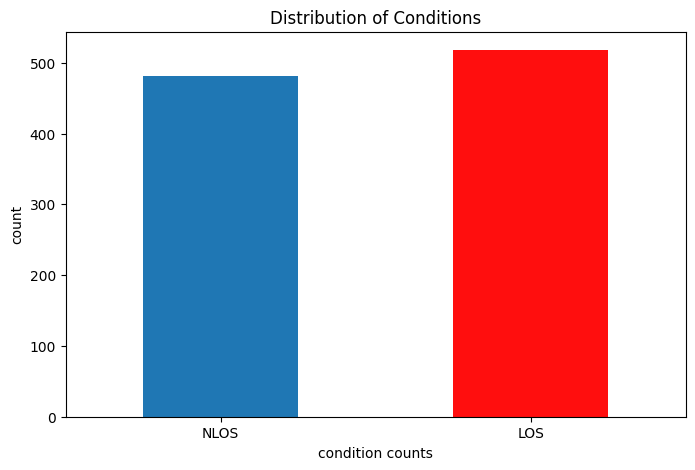

In [9]:
condition_counts = df['LOS_NLOS_Flag'].value_counts().sort_index()
plt.figure(figsize = (8, 5))
condition_counts.plot(kind = 'bar', color = ['#1f77b4', '#ff0e0e'])
plt.title('Distribution of Conditions')
plt.xlabel('condition counts')
plt.ylabel('count')
#Rotate X-axis labels to be horizontal for better readability
# Set custom labels for the X-axis ticks
plt.xticks([0, 1], ['NLOS', 'LOS'], rotation = 0)
plt.show()

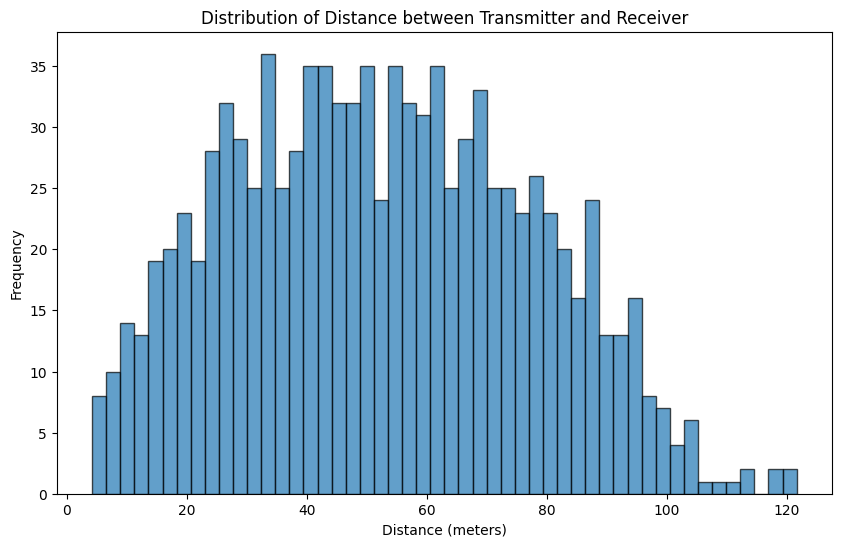

In [11]:
plt.figure(figsize = (10, 6))
plt.hist(df['Distance_m'], bins = 50, edgecolor = 'black', alpha = 0.7)

# Set the title and labels
plt.title('Distribution of Distance between Transmitter and Receiver')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')

plt.show()

In [12]:
# Calculate and print the main descriptive statistics
df['Shadowing_dB'].describe()

count    1000.000000
mean       -0.080940
std         3.210025
min       -11.065096
25%        -2.316839
50%        -0.113586
75%         2.147554
max        10.587166
Name: Shadowing_dB, dtype: float64

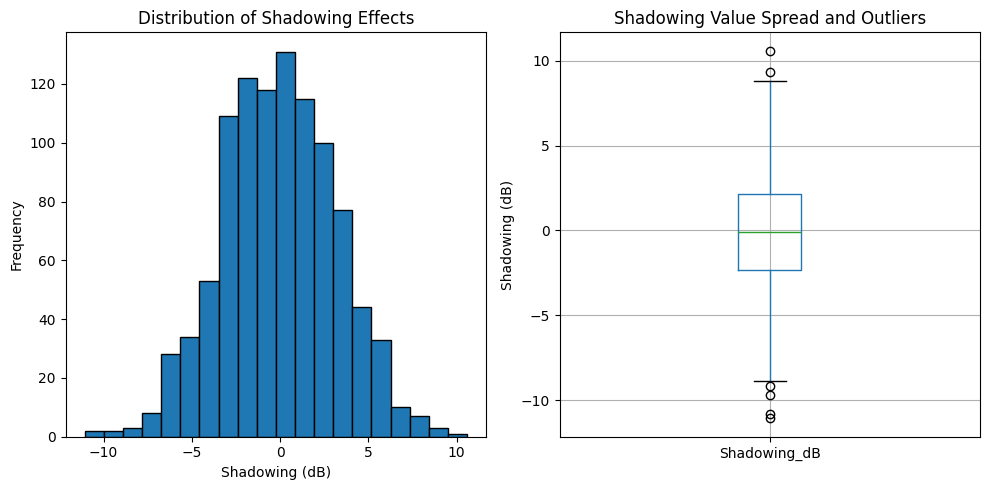

In [14]:
plt.figure(figsize = (10, 5))
# Histogram to see where the data clusters
plt.subplot(1, 2, 1)
plt.hist(df['Shadowing_dB'], bins = 20, edgecolor = 'black')
plt.title('Distribution of Shadowing Effects')
plt.xlabel('Shadowing (dB)')
plt.ylabel('Frequency')
# Box Plot to clearly identify outliers (very low or high values)
plt.subplot(1, 2, 2)
df.boxplot(column = ['Shadowing_dB'])
plt.title('Shadowing Value Spread and Outliers')
plt.ylabel('Shadowing (dB)')

plt.tight_layout() # Ensures titles and labels don't overlap
plt.show()

<Figure size 800x600 with 0 Axes>

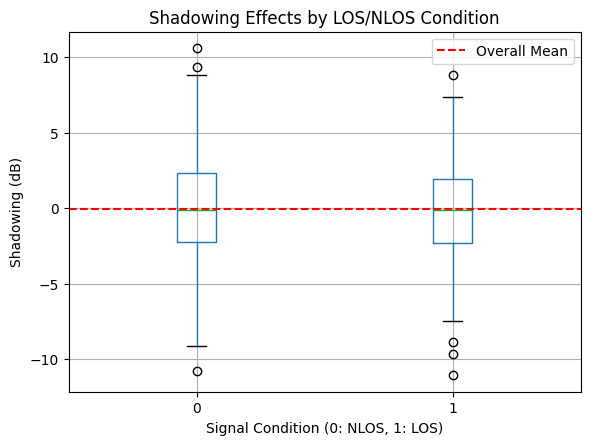

In [17]:
plt.figure(figsize = (8, 6))

# Create the boxplot grouped by the LOS/NLOS flag
df.boxplot(column = ['Shadowing_dB'], by = 'LOS_NLOS_Flag')

# Add a horizontal line to show the global mean of shadowing
plt.axhline(df['Shadowing_dB'].mean(), color = 'red', linestyle = '--', label = 'Overall Mean')

# Set labels and titles
plt.title('Shadowing Effects by LOS/NLOS Condition')
plt.suptitle('') # Removes the default pandas suptitle
plt.xlabel('Signal Condition (0: NLOS, 1: LOS)')
plt.ylabel('Shadowing (dB)')

plt.legend()
plt.show()

## 1. Analysis of Shadowing Effects
The shadowing data provides insight into signal degradation caused by environmental obstacles:

* **Symmetry Around Zero:** For both LOS and NLOS conditions, the distribution is centered almost perfectly at $0$ dB, aligning with the calculated mean of $-0.08$ dB.
* **Consistent Variability:** The interquartile range (the blue box) is nearly identical for both conditions, indicating that the general fluctuation of the signal remains consistent regardless of the visibility of the transmitter.
* **Extreme Obstructions:** Both conditions exhibit significant outliers reaching down to $-11$ dB and up to $+10$ dB, representing sudden, severe blockage events or constructive multipath interference.

<Figure size 800x600 with 0 Axes>

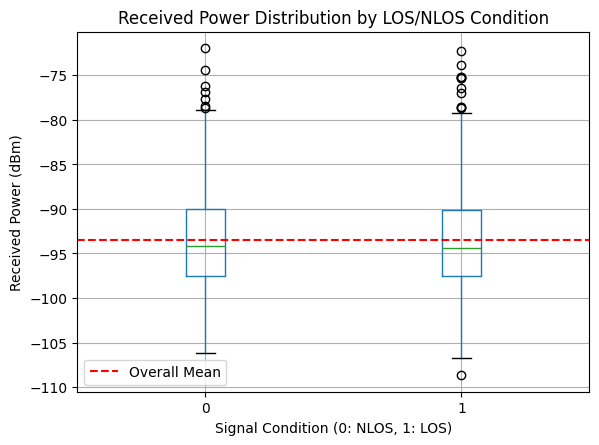

In [18]:
plt.figure(figsize = (8, 6))

# Create the boxplot grouped by the LOS/NLOS flag
df.boxplot(column = ['Received_Power_dBm'], by = 'LOS_NLOS_Flag')

# Add a horizontal line to show the global mean for comparison
plt.axhline(df['Received_Power_dBm'].mean(), color = 'red', linestyle = '--', label = 'Overall Mean')

# Set labels and titles
plt.title('Received Power Distribution by LOS/NLOS Condition')
plt.suptitle('') # Removes the default pandas suptitle
plt.xlabel('Signal Condition (0: NLOS, 1: LOS)')
plt.ylabel('Received Power (dBm)')

plt.legend()
plt.show()

## 2. Analysis of Received Power Distribution
The boxplot comparing **Received Power** against signal conditions reveals the following:

* **Impact of LOS:** While the median power for both conditions is similar, the **Line-of-Sight (1)** condition displays significantly more high-power outliers, reaching up to $-72$ dBm.
* **Comparison to Baseline:** The majority of data points for both conditions fall below the **Overall Mean** of $-93.47$ dBm (indicated by the red dashed line), suggesting that the "average" is heavily influenced by high-power peaks in specific scenarios.
* **NLOS Constraints:** The **Non-Line-of-Sight (0)** condition is more tightly clustered around the lower power range, showing fewer instances of high signal strength compared to LOS.

## 3. Key Takeaways
Based on the visual evidence from both plots, several conclusions can be made regarding the 5G environment:

* **Non-Determinism of LOS:** The status of **Line-of-Sight vs. Non-Line-of-Sight** is not the sole determinant of performance, as the medians for power and shadowing are remarkably similar across both categories.
* **Environmental Complexity:** The presence of numerous outliers suggests a highly dynamic environment where signal strength is frequently impacted by sudden changes, such as moving obstacles or reflections.
* **Requirement for Further Modeling:** Because the LOS flag does not clearly separate the data into two distinct performance tiers, other features such as `Distance_m`, `Humidity`, and `Temperature` must be analyzed to understand what truly drives signal loss.

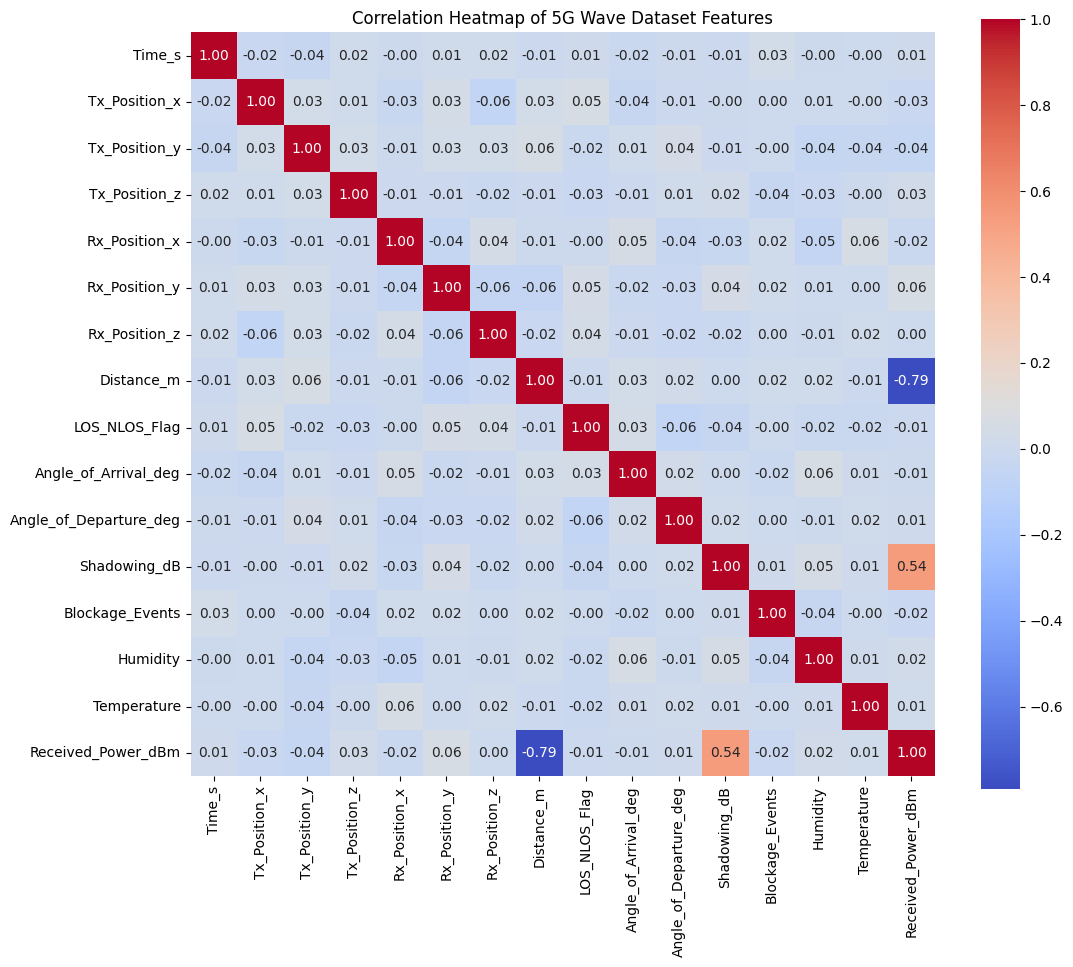

Correlations with Received_Power_dBm:
Received_Power_dBm        1.000000
Shadowing_dB              0.543286
Rx_Position_y             0.059997
Tx_Position_z             0.025136
Humidity                  0.021148
Temperature               0.013934
Time_s                    0.012119
Angle_of_Departure_deg    0.011422
Rx_Position_z             0.001748
Angle_of_Arrival_deg     -0.005776
LOS_NLOS_Flag            -0.009638
Rx_Position_x            -0.017153
Blockage_Events          -0.023126
Tx_Position_x            -0.027715
Tx_Position_y            -0.043783
Distance_m               -0.792634
Name: Received_Power_dBm, dtype: float64


In [19]:
import seaborn as sns
# Calculate the correlation matrix
# This computes the Pearson correlation coefficient between all numerical columns
corr_matrix = df.corr()
# Create the Heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm', square = True)
# Add titles an labels
plt.title('Correlation Heatmap of 5G Wave Dataset Features')
plt.show()
# Specifically examine correlations with the target variable (Received Power)
received_power_corr = corr_matrix['Received_Power_dBm'].sort_values(ascending = False)
print("Correlations with Received_Power_dBm:")
print(received_power_corr)

### **1. Interpreting Correlation Direction and Magnitude**
The correlation matrix allows us to quantify the relationship between environmental variables and the 5G signal strength (**Received_Power_dBm**).

#### **A. The Direction (Positive vs. Negative)**
* **Positive Correlation ($> 0$):** As one value increases, the other also increases. For example, **Shadowing_dB** has a correlation of $+0.543$. This means that higher (less negative) shadowing values, indicating fewer obstructions or constructive multipath, directly correlate with stronger received power.
* **Negative Correlation ($< 0$):** As one value increases, the other decreases. The most significant result is **Distance_m** at $-0.793$. This proves that as the receiver moves further from the transmitter, signal power drops significantly due to path loss.

#### **B. The Strength (Magnitude)**
* **Strong ($0.7$ to $1.0$):** **Distance_m** ($-0.793$) is a dominant predictor of signal loss. This follows the fundamental physics of wave propagation where power density decreases over distance.
* **Moderate ($0.4$ to $0.6$):** **Shadowing_dB** ($+0.543$) is a moderate predictor. While distance is the primary factor, environmental obstacles are the secondary drivers of power variance.
* **Weak ($0.0$ to $0.1$):** **Humidity**, **Temperature**, and **LOS_NLOS_Flag** show values near zero (e.g., Humidity at $+0.021$). This indicates they have very little linear impact on the power in this specific dataset.
### **2. The "Why" behind the 5G Context**
Understanding these correlations is crucial for designing 5G network layouts and signal processing algorithms.

* **Why is the LOS/NLOS correlation so low?** In 5G environments, Non-Line-of-Sight (**NLOS**) signals can still maintain high power due to reflections off surfaces (multipath propagation). The low correlation of $-0.009$ suggests that being "Out of Sight" doesn't automatically cause a signal failure if the receiver is close to the transmitter or benefits from strong reflections.
* **Why is the Distance correlation so high?** 5G waves, particularly at higher frequencies, attenuate rapidly. The $-0.793$ score confirms that "Path Loss" is the single most critical aspect of the simulation, making distance management the priority for network reliability.
* **The Shadowing Relationship:** The $+0.543$ correlation with **Shadowing_dB** highlights that random obstacles (trees, buildings) create significant signal "fading" that must be compensated for by the network's power control systems.
### **3. Further Analysis: Beyond Linear Correlations**
While the Pearson correlation provides a baseline, a deeper examination reveals more about the 5G channel behavior:

* **Spatial Independence:** The absolute coordinates (**Tx_Position** and **Rx_Position**) show very low correlations (ranging from $-0.04$ to $+0.06$). This indicates that the signal strength is independent of *where* you are in the grid, but highly dependent on the *relative distance* between the nodes.
* **Impact of Blockage Events:** **Blockage_Events** shows a correlation of only $-0.023$. This suggests that the impact of a blockage is likely already "baked into" the **Shadowing_dB** value, rather than acting as a separate linear factor.
* **Non-Linearity of Weather:** Although **Humidity** and **Temperature** have near-zero linear correlation here, their impact in real-world 5G (especially mmWave) is often non-linear and only becomes significant at extreme ranges or very high frequencies (THz), which may not be the primary focus of this specific 121-meter range dataset.
* **Angular Sensitivity:** The **Angle of Arrival** and **Departure** also show low linear correlation (approx. $-0.005$ to $+0.01$). This implies that the direction of the antenna doesn't change the power linearly; instead, it likely affects the signal quality through specific "beams" which would require a non-linear analysis (like a Random Forest model) to detect.

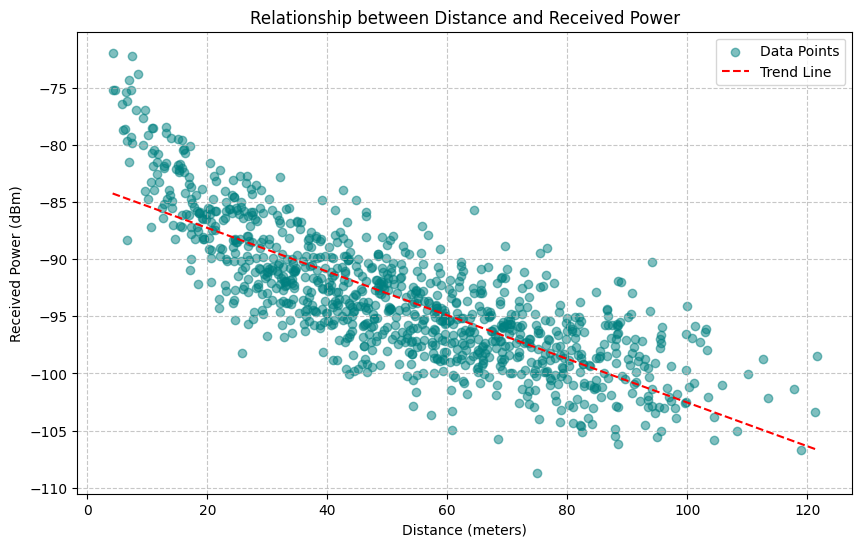

In [20]:
# Create the Scatter Plot
plt.figure(figsize = (10, 6))
plt.scatter(df['Distance_m'], df['Received_Power_dBm'], alpha = 0.5, color = 'teal', label = 'Data Points')
# Add a Trend Line
# We use 'np.polyfit' to calculate a linear regression (degree 1)
# The trend line helps visualize the 'average' path of signal decay
z = np.polyfit(df['Distance_m'], df['Received_Power_dBm'], 1)
p = np.poly1d(z)
plt.plot(df['Distance_m'].sort_values(), p(df['Distance_m'].sort_values()), "r--", label = 'Trend Line')
# Final Formatting
plt.title('Relationship between Distance and Received Power')
plt.xlabel('Distance (meters)')
plt.ylabel('Received Power (dBm)')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

## 1. Regression Analysis: The Trend Line Equation
The scatter plot includes a linear regression line that quantifies the relationship between distance and power:

* **The Equation:** $y = -0.1910x - 83.45$.
* **Understanding the Slope:** The value $-0.1910$ indicates that for every 1-meter increase in distance, the received signal strength drops by approximately $0.19$ dBm.
* **The Intercept:** The $-83.45$ value represents the "Reference Power"—the estimated signal strength if the receiver were theoretically at 0 meters from the transmitter.
* **High Predictive Accuracy:** The high negative correlation of $-0.79$ ensures that this linear model is a reliable tool for predicting signal drop-off across the 120-meter range.
## 2. Signal Decay and Path Loss Observations
Visualizing the raw data points against the trend line provides insight into the 5G propagation environment:

* **Visual Drop-off:** The plot shows a clear diagonal descent from the top-left (short distance, high power) to the bottom-right (long distance, low power), illustrating the physical reality of path loss.
* **Understanding the "Spread" (Variance):** Data points do not sit perfectly on the line; instead, there is a vertical "cloud" of points at every distance interval.
* **Impact of Shadowing:** This vertical spread is primarily caused by **Shadowing_dB** and **Blockage_Events**. Even at a fixed distance, a signal may be $10$ dBm weaker if an obstacle is present.
* **Practical Example:** At a distance of $60$ meters, power levels vary between $-90$ dBm and $-100$ dBm depending on whether the receiver is in a **Line-of-Sight (LOS)** or **Non-Line-of-Sight (NLOS)** condition.
## 3. Technical Takeaways for 5G Network Planning
This analysis is fundamental for determining the operational limits of a 5G cell:

* **Critical Range Calculation:** High-speed 5G data transmission typically requires a signal threshold (e.g., above $-100$ dBm). Using the trend line, we can calculate that the signal reaches this critical floor at approximately $86$ meters.
* **Cell Radius Design:** This plot allows network engineers to define the "Maximum Cell Radius" before a handover to another transmitter is required to maintain quality of service.
* **Link Budgeting:** The variance shown in the scatter plot highlights the need for a "Fade Margin"—extra power built into the system to ensure the connection doesn't drop during sudden shadowing or blockage events.

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
# 1. Define Features and Target
features = [
    'Distance_m', 'Shadowing_dB', 'LOS_NLOS_Flag',
    'Angle_of_Arrival_deg', 'Angle_of_Departure_deg',
    'Blockage_Events', 'Humidity', 'Temperature',
    'Tx_Position_x', 'Tx_Position_y', 'Tx_Position_z',
    'Rx_Position_x', 'Rx_Position_y', 'Rx_Position_z'
]
X = df[features]
y = df['Received_Power_dBm']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train XGBoost
# XGBoost is often faster and more efficient for large datasets
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred):.4f}")

XGBoost R2 Score: 0.9874


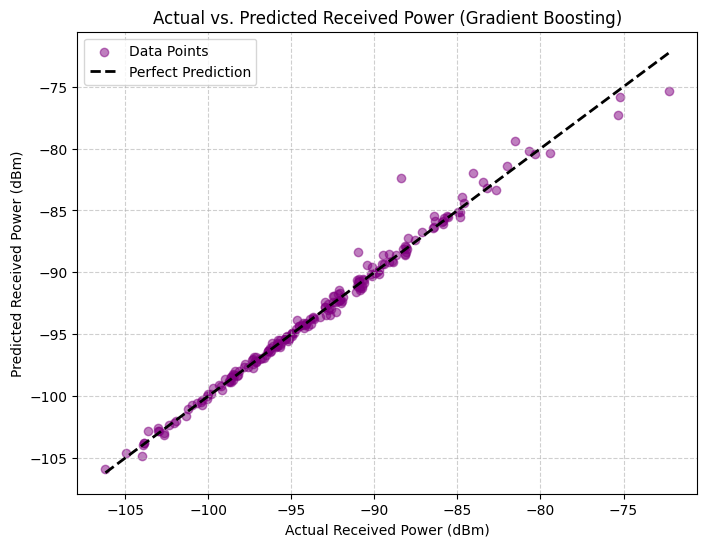

In [22]:
# 5. Create the "Actual vs. Predicted" Plot
plt.figure(figsize = (8, 6))

# Scatter plot of actual values on x-axis and predicted on y-axis
plt.scatter(y_test, y_pred, alpha = 0.5, color = 'purple', label = 'Data Points')

# Draw a 45-degree diagonal line representing perfect prediction
# If all points fall on this line, the model is 100% accurate.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'Perfect Prediction')

# Formatting labels and title
plt.title('Actual vs. Predicted Received Power (Gradient Boosting)')
plt.xlabel('Actual Received Power (dBm)')
plt.ylabel('Predicted Received Power (dBm)')
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.6)

plt.show()

In [23]:
# 1. Select ONLY the top 5 most important features discovered
pruned_features = ['Distance_m', 'Shadowing_dB', 'Rx_Position_y', 'Tx_Position_y', 'Tx_Position_z']
X = df[pruned_features]
y = df['Received_Power_dBm']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train XGBoost on Pruned Data
# Max_depth=5 is usually sufficient for 5G propagation models
xgb_pruned = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_pruned.fit(X_train, y_train)

# 4. Evaluate
y_pred = xgb_pruned.predict(X_test)
print(f"Pruned XGBoost R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Pruned XGBoost MAE: {mean_absolute_error(y_test, y_pred):.4f}")

Pruned XGBoost R2 Score: 0.9896
Pruned XGBoost MAE: 0.3203


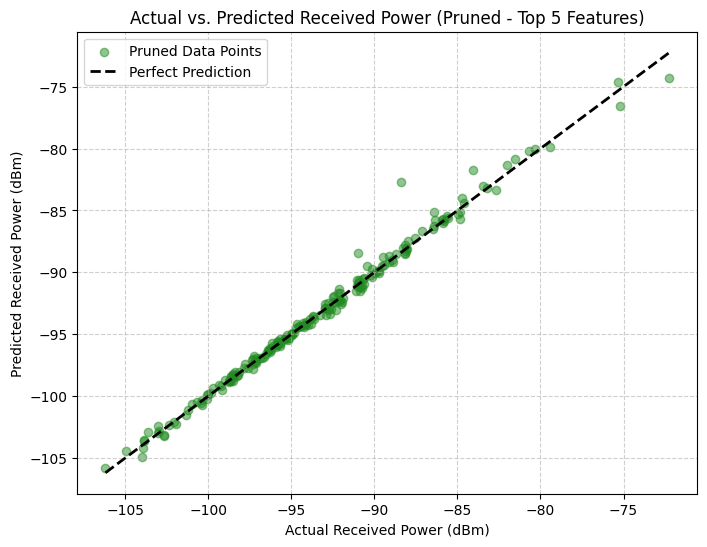

In [24]:
# 5. Create the Plot
plt.figure(figsize=(8, 6))

# Scatter plot: Forest green represents the 'cleaner' pruned dataset
plt.scatter(y_test, y_pred, alpha=0.5, color='forestgreen', label='Pruned Data Points')

# Diagonal 'Perfect Prediction' line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

# Formatting for readability
plt.title('Actual vs. Predicted Received Power (Pruned - Top 5 Features)')
plt.xlabel('Actual Received Power (dBm)')
plt.ylabel('Predicted Received Power (dBm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()